# Website A/B Testing - Lab

## Introduction

In this lab, you'll get another chance to practice your skills at conducting a full A/B test analysis. It will also be a chance to practice your data exploration and processing skills! The scenario you'll be investigating is data collected from the homepage of a music app page for audacity.

## Objectives

You will be able to:
* Analyze the data from a website A/B test to draw relevant conclusions
* Explore and analyze web action data

## Exploratory Analysis

Start by loading in the dataset stored in the file 'homepage_actions.csv'. Then conduct an exploratory analysis to get familiar with the data.

> Hints:
    * Start investigating the id column:
        * How many viewers also clicked?
        * Are there any anomalies with the data; did anyone click who didn't view?
        * Is there any overlap between the control and experiment groups? 
            * If so, how do you plan to account for this in your experimental design?

In [16]:
import pandas as pd

In [30]:
df = pd.read_csv('homepage_actions.csv')
df.head()

,timestamp,id,group,action
0,2016-09-24 17:42:27.839496,804196,experiment,view
1,2016-09-24 19:19:03.542569,434745,experiment,view
2,2016-09-24 19:36:00.944135,507599,experiment,view
3,2016-09-24 19:59:02.646620,671993,control,view
4,2016-09-24 20:26:14.466886,536734,experiment,view


In [31]:
len(df["id"].unique())

6328

In [18]:
df.drop(["timestamp"], axis=1, inplace=True)

In [19]:
df.head()

,id,group,action
0,804196,experiment,view
1,434745,experiment,view
2,507599,experiment,view
3,671993,control,view
4,536734,experiment,view


In [21]:
df.set_index(["id", "group"], inplace=True)

In [27]:
df.head()

,,action
id,group,
804196,experiment,view
434745,experiment,view
507599,experiment,view
671993,control,view
536734,experiment,view


In [28]:
len(df)

8188

In [29]:
len(df["id"].unique())

KeyError: 'id'

## Conduct a Statistical Test

Conduct a statistical test to determine whether the experimental homepage was more effective than that of the control group.

We're going to look at this from the following point of view: What fraction of people who visited either the control or the experimental homepage clicked?

What fraction of the experimental group clicked?

In [5]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

In [42]:
def get_fraction_difference(df):
    num_experiment_ids = len(df[(df["group"] == "experiment")]["id"].unique())
    num_control_ids = len(df[(df["group"] == "control")]["id"].unique())

    experiment_clicks = len(df[(df["action"] == "click") & (df["group"] == "experiment")]["id"].unique())
    control_clicks = len(df[(df["action"] == "click") & (df["group"] == "control")]["id"].unique())

    experiment_fraction = experiment_clicks/float(num_experiment_ids)
    control_fraction = control_clicks/float(num_control_ids)
    
    fraction_difference = experiment_fraction - control_fraction
    
    return fraction_difference

In [58]:
ntrials = 10000
fraction_differences = []
for _ in range(ntrials):
    shuffled_df = df.copy()
    shuffled_df["group"] = np.random.permutation(df["group"].values)
    fraction_differences.append(get_fraction_difference(shuffled_df))

In [59]:
actual_fraction_difference = get_fraction_difference(df)

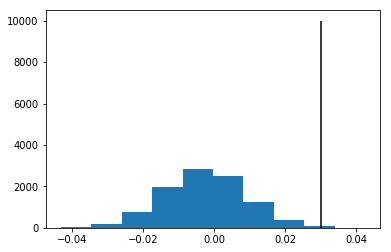

In [60]:
plt.hist(fraction_differences)
plt.vlines(x=actual_fraction_difference, ymin=0, ymax=ntrials)

In [61]:
p_value = np.mean(np.array(fraction_differences)>actual_fraction_difference)
p_value

0.0022

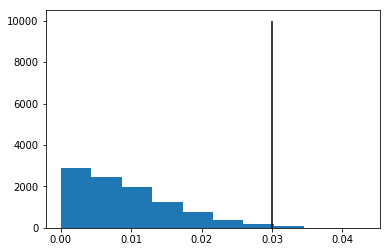

In [63]:
plt.hist(np.abs(fraction_differences))
plt.vlines(x=np.abs(actual_fraction_difference), ymin=0, ymax=ntrials)

In [64]:
p_value = np.mean(np.abs(fraction_differences)>np.abs(actual_fraction_difference))
p_value

0.0099

## Verifying Results

One sensible formulation of the data to answer the hypothesis test above would be to create a binary variable representing each individual in the experiment and control group. This binary variable would represent whether or not that individual clicked on the homepage; 1 for they did and 0 if they did not. 

The variance for the number of successes in a sample of a binomial variable with n observations is given by:

## $n\bullet p (1-p)$

Given this, perform 3 steps to verify the results of your statistical test:
1. Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 
2. Calculate the number of standard deviations that the actual number of clicks was from this estimate. 
3. Finally, calculate a p-value using the normal distribution based on this z-score.

### Step 1:
Calculate the expected number of clicks for the experiment group, if it had the same click-through rate as that of the control group. 

In [65]:
def get_fractions(df):
    num_experiment_ids = len(df[(df["group"] == "experiment")]["id"].unique())
    num_control_ids = len(df[(df["group"] == "control")]["id"].unique())

    experiment_clicks = len(df[(df["action"] == "click") & (df["group"] == "experiment")]["id"].unique())
    control_clicks = len(df[(df["action"] == "click") & (df["group"] == "control")]["id"].unique())

    experiment_fraction = experiment_clicks/float(num_experiment_ids)
    control_fraction = control_clicks/float(num_control_ids)
    
    return experiment_fraction, control_fraction

In [74]:
num_experiment_ids = len(df[(df["group"] == "experiment")]["id"].unique())
num_control_ids = len(df[(df["group"] == "control")]["id"].unique())

experiment_clicks = len(df[(df["action"] == "click") & (df["group"] == "experiment")]["id"].unique())
control_clicks = len(df[(df["action"] == "click") & (df["group"] == "control")]["id"].unique())

experiment_fraction = experiment_clicks/float(num_experiment_ids)
control_fraction = control_clicks/float(num_control_ids)

In [76]:
expected_experiment_clicks = control_fraction*num_experiment_ids
expected_experiment_clicks

838.0168067226891

In [77]:
experiment_std = np.sqrt(num_experiment_ids*experiment_fraction*(1-experiment_fraction))
experiment_std

25.30919609963171

In [78]:
experiment_clicks

928

In [79]:
zscore = (experiment_clicks-expected_experiment_clicks)/experiment_std
zscore

3.555355647136508

In [80]:
import scipy.stats as stats
p_val = stats.norm.sf(zscore) #or 1 - stats.norm.cdf(z_score)
print(p_val)

0.00018873407314092536


### Step 2:
Calculate the number of standard deviations that the actual number of clicks was from this estimate.

In [ ]:
#Your code here

### Step 3: 
Finally, calculate a p-value using the normal distribution based on this z-score.

In [ ]:
#Your code here

### Analysis:

Does this result roughly match that of the previous statistical test?

> Comment: The numerical results are not that close, but

## Summary

In this lab, you continued to get more practice designing and conducting AB tests. This required additional work preprocessing and formulating the initial problem in a suitable manner. Additionally, you also saw how to verify results, strengthening your knowledge of binomial variables, and reviewing initial statistical concepts of the central limit theorem, standard deviation, z-scores, and their accompanying p-values.